In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from numpy import save
import keras
import os
from os import listdir
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [ ]:
folder  = '/content/drive/MyDrive/age/020'
folder1 ='/content/drive/MyDrive/age/021'
folder2 = '/content/drive/MyDrive/age/022'
folder3 = '/content/drive/MyDrive/age/023'
folder4 = '/content/drive/MyDrive/age/024'
folder5 = '/content/drive/MyDrive/age/025'
folder6 = '/content/drive/MyDrive/age/026'
folder7 = '/content/drive/MyDrive/age/027'
folder8 = '/content/drive/MyDrive/age/028'
folder9 = '/content/drive/MyDrive/age/029'
folder10 = '/content/drive/MyDrive/age/030'
folders=[folder,folder1,folder2,folder3,folder4,folder5,folder6,folder7,folder8,folder9,folder10]
photos, labels = list(), list()
for i in range (11):
  for file in listdir(folders[i]):
    output=i

    photo = load_img(folders[i]+'/'+file, target_size=(128,128))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/age/age_photos.npy',photos)
save('/content/drive/MyDrive/age/age_labels.npy',labels)

(6642, 128, 128, 3) (6642,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [ ]:
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(512 activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(11, activation='Softmax')) 

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
37/37 [==============================] - 15s 100ms/step - loss: 2.8413 - accuracy: 0.0985 - val_loss: 2.3970 - val_accuracy: 0.0898
Epoch 2/100
37/37 [==============================] - 3s 71ms/step - loss: 2.3862 - accuracy: 0.1202 - val_loss: 2.3989 - val_accuracy: 0.1064
Epoch 3/100
37/37 [==============================] - 3s 71ms/step - loss: 2.3719 - accuracy: 0.1422 - val_loss: 2.4040 - val_accuracy: 0.1144
Epoch 4/100
37/37 [==============================] - 3s 71ms/step - loss: 2.3475 - accuracy: 0.1542 - val_loss: 2.4086 - val_accuracy: 0.1014
Epoch 5/100
37/37 [==============================] - 3s 72ms/step - loss: 2.3022 - accuracy: 0.1912 - val_loss: 2.4352 - val_accuracy: 0.1104
Epoch 6/100
37/37 [==============================] - 3s 72ms/step - loss: 2.2407 - accuracy: 0.2205 - val_loss: 2.4743 - val_accuracy: 0.1199
Epoch 7/100
37/37 [==============================] - 3s 72ms/step - loss: 2.1160 - accuracy: 0.2837 - val_loss: 2.5793 - val_accuracy: 0.0963
Epoc

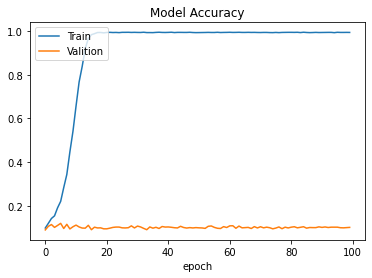

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Valition'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/age/age_model.h5')